<a href="https://colab.research.google.com/github/Dennieeeee/Take-Home-Challenges/blob/main/conversion_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/Take-Home-Challenges/main/Data/conversion_data.csv')

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.shape

(316200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


# Data Cleaning

In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
# remove age over 90
df = df[df['age'] < 90]

In [8]:
df['country'].value_counts()

US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64

In [9]:
df['source'].value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

In [10]:
print('There are {} duplicated records in this dataset.'.format(df.duplicated().sum()))

There are 299903 duplicated records in this dataset.


In [11]:
df_clean = df.copy()

In [12]:
starting_percentile = df_clean['age'].quantile(.01)
ending_percentile = df_clean['age'].quantile(.99)
outliers_df = df_clean.loc[((df_clean['age'] <= starting_percentile) | (df_clean['age'] >= ending_percentile))]
df_clean = df_clean.loc[((df_clean['age'] > starting_percentile) & (df_clean['age'] < ending_percentile))]


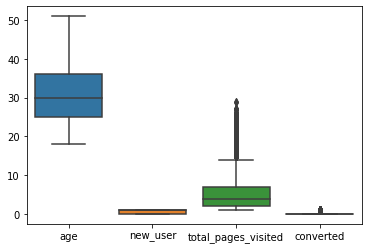

In [13]:
sns.boxplot(data=df_clean)

# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


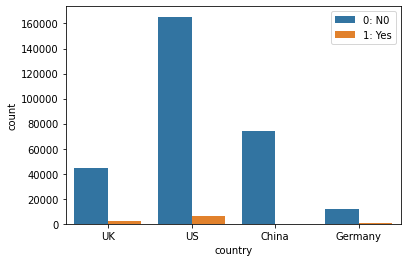

In [14]:
sns.countplot('country', hue='converted', data=df_clean)
plt.legend(['0: N0', '1: Yes'],
           loc= 'upper right')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


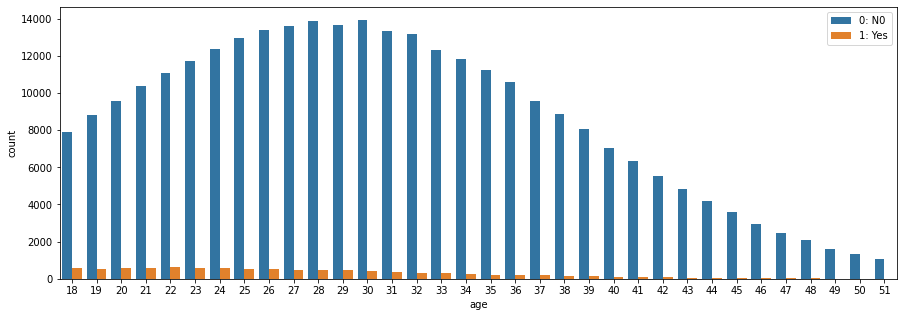

In [15]:
plt.figure(figsize=(15,5))
sns.countplot('age', hue='converted', data=df_clean)
plt.legend(['0: N0', '1: Yes'],
           loc= 'upper right')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


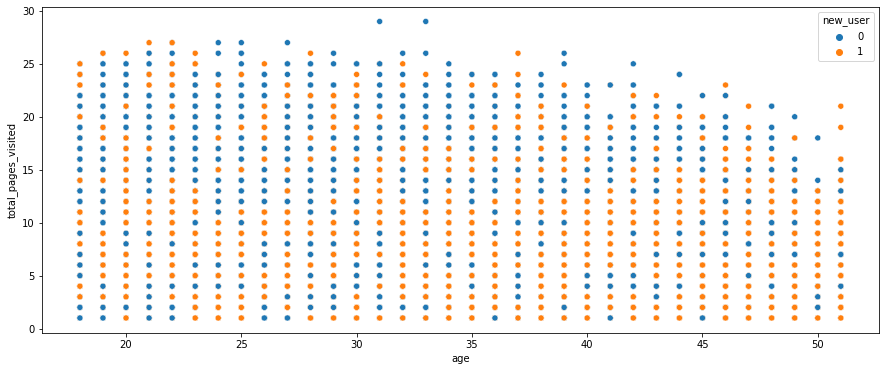

In [16]:
plt.figure(figsize=(15,6))
sns.scatterplot('age','total_pages_visited', hue='new_user',data=df_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


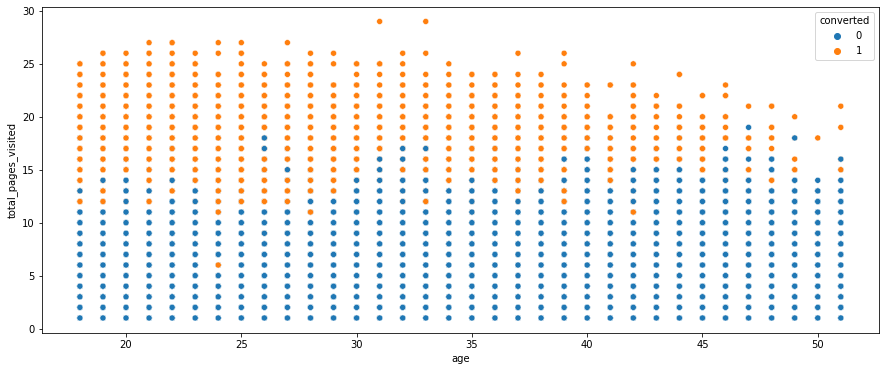

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot('age','total_pages_visited', hue='converted',data=df_clean)

In [18]:
conversion_rate = (df_clean['converted'].sum() / len(df_clean['converted'])) * 100

In [19]:
print('The total conversion rate is {:.2f}%'.format(conversion_rate))

The total conversion rate is 3.16%


In [20]:
# Create a count column filled with 1's
df_clean['count'] = 1

In [35]:
# Define a function create_df that will create a new dataframe with the conversion rate according to the groupings
def create_df(cat):
    '''Group the data by the [cat]'''
    new_df = df_clean.groupby(cat).agg({'converted':sum, 'count':sum})
    new_df['total_percentage'] = new_df['count'] / new_df['count'].sum()
    new_df['conversion_rate'] = new_df['converted'] / new_df['count']
    return new_df

# Define a function create_plots to create barplots according to the provided dataframe
def create_plots(df_clean):
    '''Plot barplots and histograms for conversion rate and ditribution 
    given the dataframe'''
    fig, ax = plt.subplots(nrows=2, figsize=(10,6))
    
    # Plot the distribution
    sns.barplot(x=df_clean.index, y='count', data=df_clean, ax=ax[0])
    
    # Plot the conversion rates
    sns.barplot(x=df_clean.index, y='conversion_rate', data=df_clean, ax=ax[1])
    
    plt.tight_layout()

         converted   count  total_percentage  conversion_rate
country                                                      
China           98   73870          0.242220         0.001327
Germany        772   12596          0.041302         0.061289
UK            2420   46748          0.153287         0.051767
US            6348  171757          0.563191         0.036959


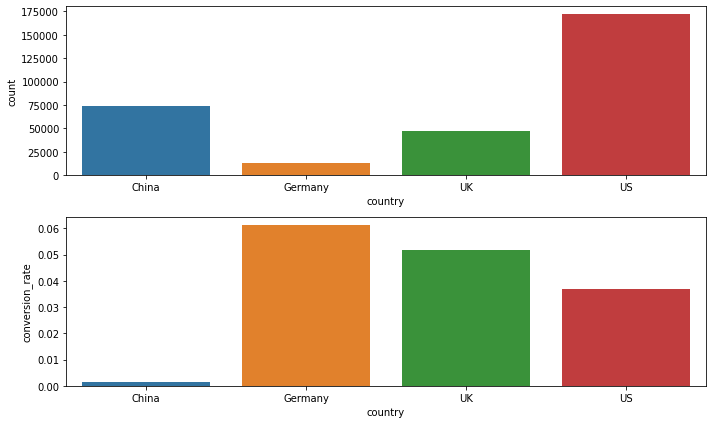

In [36]:
country_df = create_df('country')
print(country_df)
create_plots(country_df)

        converted   count  total_percentage  conversion_rate
source                                                      
Ads          2897   85599          0.280679         0.033844
Direct       1915   69831          0.228976         0.027423
Seo          4826  149541          0.490345         0.032272


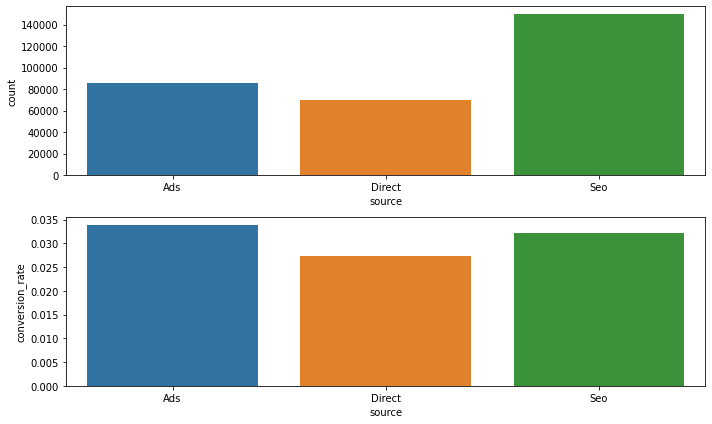

In [37]:
source_df = create_df('source')
print(source_df)
create_plots(source_df)

<function matplotlib.pyplot.tight_layout>

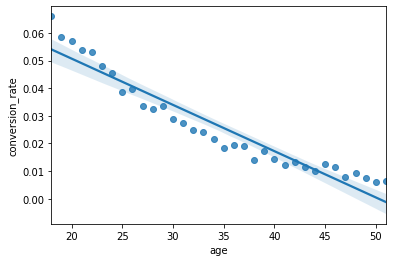

In [34]:

df_age = create_df('age').reset_index()
sns.regplot(x='age', y='conversion_rate', data=df_age)
plt.tight_layout

In [24]:
df_clean.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted', 'count'],
      dtype='object')

In [25]:
df_clean['conversion_rate'] = df_clean['converted'] / df_clean['count']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


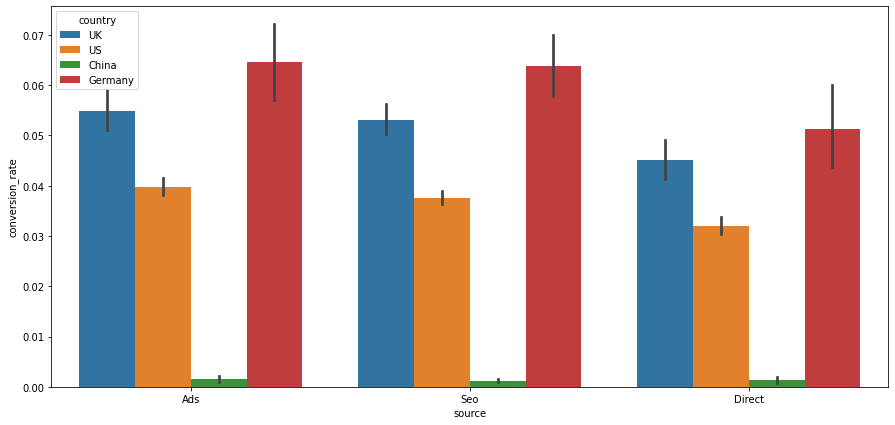

In [26]:
plt.figure(figsize=(15,7))
sns.barplot('source','conversion_rate', hue='country', data=df_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


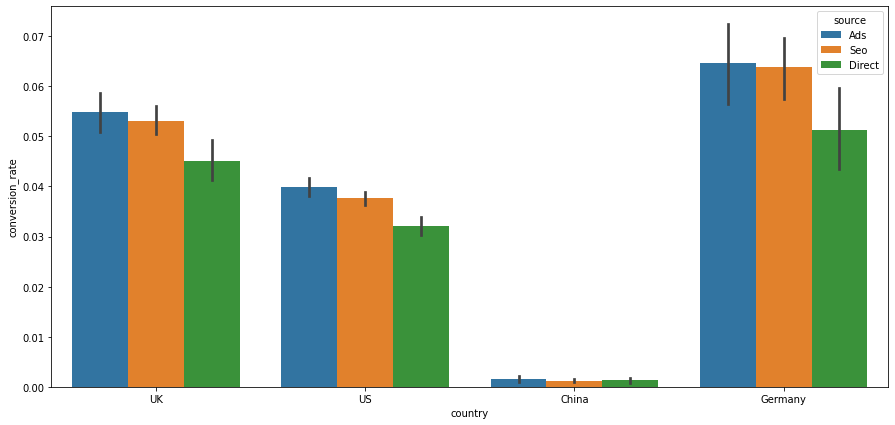

In [27]:
plt.figure(figsize=(15,7))
sns.barplot('country','conversion_rate', hue='source', data=df_clean)

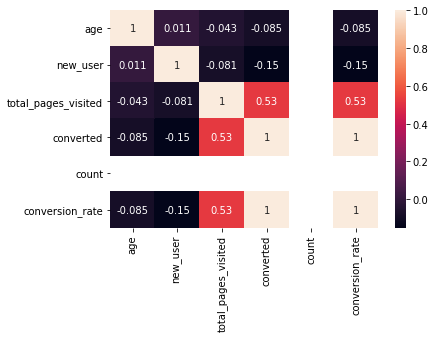

In [28]:
sns.heatmap(df_clean.corr(),annot=True)